In [2]:
import os
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt

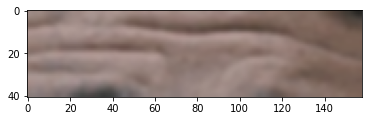

41 158
[2, 2, 3, 4, 4, 5, 11, 13, 34] 8
3


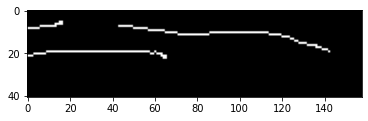

In [110]:
image = cv2.imread('images/forehead_wrinkles.jpg')

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.GaussianBlur(image, (5,5), 0)

plt.imshow(image)
plt.show()

image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
# Canny recommendation
med_val = np.median(image_gray) 
lower = int(max(0, 0.7*med_val))
upper = int(min(255, 1.3*med_val))

canny = cv2.Canny(image_gray, lower, upper, 5)

height, width = canny.shape
print(height, width)

# Consider 16 horizontal lines for height
q = int(height/17)

wrink = list()
tot_white = 0

for i in range(0, height, q):
    white = 0
    for j in range(0, width):
        if canny[i][j] == 255:
            white = white + 1
    if white != 0:
        tot_white = tot_white + white
        wrink.append(white)

# not median, because median will be dependent on q

wrink.sort()

mean = tot_white//len(wrink)
print(wrink, mean)

tot_wrinkles = 0

for i in wrink:
    if i >= mean:
        tot_wrinkles = tot_wrinkles + 1

print(tot_wrinkles)
        
plt.imshow(canny,  cmap='gray')
plt.show()

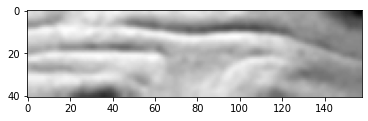

In [4]:
image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(image_gray,  cmap='gray')
plt.show()

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 ...
 [  0   0   0 ... 211 180 164]
 [  0   0   0 ... 154 145 140]
 [  0   0   0 ...   0   0   0]]


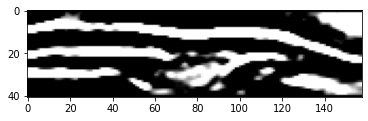

In [13]:
sobely = cv2.Sobel(image_gray, cv2.CV_8UC1, 0, 1, ksize=5)

print(sobely)

plt.imshow(sobely,  cmap='gray')
plt.show()

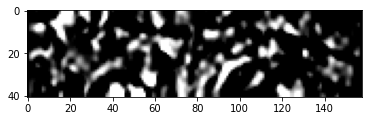

In [6]:
sobelx = cv2.Sobel(image_gray, cv2.CV_8UC1, 1, 0, ksize=5)

plt.imshow(sobelx,  cmap='gray')
plt.show()